# Prereading


## Penalization

---

**Positive definite** $A$ (so $y^T A y > 0$) and $\lambda > 0$ defining **smoothing matrix** $S$
giving $\hat y = \underbrace{(I + \lambda A)^{-1}}_{S_{n \times n}} y$ 
also solves the **penalized least squares** problem

$$\min_{S|\lambda, A}||y-Sy||_2^2 + \lambda \left(||Sy||^A_2\right)^2 = \min_{\hat y} (y-\hat y)^T(y-\hat y) + \lambda \hat y^T A\hat y$$

where the weighted linear combination of $y_i$ and all other $y_{j \not = i}$ defining $\hat y_i$ follows from 

$$\nabla_{\hat y} \left(\underset{\text{$\hat y_i$ with close $x_i$ should be close}}{\overset{\text{penalized least squares: $A$ means}}{(y-\hat y)^T(y-\hat y) + \lambda \hat y^T \!\!A \hat y}} \right) = -2y + 2\hat y + 2 \lambda A \hat y = 0$$

The **penalized least squares** form of **smoothing matrices** suggests other **penalized** forms of the linear regression problem, such as

$$\min_{\beta|\lambda}||y-X\beta||_2^2 + \lambda ||\beta||_p^p$$

which takes the two canonical forms

$$\underset{\text{Lasso Regression $L_1$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \sum_k |\beta_k|}}\quad\quad \underset{\text{Ridge Regression $L_2^2$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \beta^T\beta}} 
$$

The solution to the $L_2^2$ penalty form is also known as **Tikhonov regularization** and has the solution

$${\displaystyle {\hat {\beta }}=( {X} ^{\mathsf {T}} \!{X} +\lambda  {I} )^{-1} {X} ^{\mathsf {T}} \!{y} }$$

> Adding to the diagonal of the **grammian** in $( {X} ^{\mathsf {T}} \!{X} +\lambda  {I} )$ can greatly benefit the **condition number** of the problem. You may recall that in the discussion regarding the relative numerical accuracy of the **QR**, **Cholesky**, or **SVD** approaches to solving the **normal equations**, it was actually **Tikhonov regularization** that was the [recommended solution](https://www.quora.com/Is-it-better-to-do-QR-Cholesky-or-SVD-for-solving-least-squares-estimate-and-why) to address a truly **ill-conditioned** design matrix $X$ (since none of the **QR**, **Cholesky**, or **SVD** approaches will be able to address volatility due to unavoidable **roundoff error** in the context of a truly **ill-conditioned** problem). 



## Generalizability

--- 

If $\hat y = \hat f(x) \not \approx E[y|x]$ then $f$ is said to to be either **overfit** or **underfit** such that model predictions do not **generalize** well to future predictions.

- The **saturated model** $\hat y = y$, e.g., $X\hat \beta=y$ is maximally **overfit**

- The **null model** $\hat y = \hat \beta_0$ is maximally **underfit**


## [Optional] Shrinkage 

--- 

The mechanism of **ridge** and **lasso penalizations** serves to **shrink** coefficient estimates towards $0$ by penalizing large coefficient values. This form of **penalization** results in so-called  **shrinkage regularization**.  Interestingly, the solution to the **ridge** and **lasso regression** optimization problems is the **maximum a posteriori** (MAP) estimate for specific choices of **Bayesian priors**

\begin{align*}
\log \left(\left( \prod_{i=1}^n \frac{1}{\sqrt{2\sigma}}e^{-\frac{}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2} \right) 
(2\sigma_0)^{-p/2} 
e^{-\frac{(\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\intercal(\boldsymbol{\beta}-\boldsymbol{\beta}_0)}{2\sigma_0^p}}
\right) {} = & 
\sum_{i=1}^n  \log \frac{1}{\sqrt{2\sigma}} - \sum_{i=1}^n \frac{1}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2 + \\
 & {} 
\log \left((2\sigma_0)^{-p/2}\right) - \frac{(\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\intercal(\boldsymbol{\beta}-\boldsymbol{\beta}_0)}{2\sigma_0^p}\\\\
\log \left(\left( \prod_{i=1}^n \frac{1}{\sqrt{2\sigma}}e^{-\frac{}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2} \right) 
\prod_{k=1}^p
\frac{1}{2b_{k0}} 
e^{-\frac{|\beta_k-\beta_{k0}|}{b_{k0}}}
\right) {} = & 
\sum_{i=1}^n  \log \frac{1}{\sqrt{2\sigma}} - \sum_{i=1}^n \frac{1}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right) + \\
 & {} 
\sum_{k=1}^{p} \log \frac{1}{2b_{k0}} - 
\sum_{k=1}^{p} \frac{|\beta_k-\beta_{k0}|}{b_{k0}} 
\end{align*}

**Bayesian analysis** thus naturally provides **regularization** through the ***prior*** specification, and different forms of **shrinkage regularization** can be induced by specifying different **priors**

- **Gaussian** and **Laplace priors** correspond to $L_2$ and $L_1$ shrinkage
- a **Cauchy prior** has the effect of combining the $L_2$ and $L_1$ constraints into a "rounded square diamond" shape
- and the **horseshoe prior** can both ***shrink*** and ***inflate*** coefficient estimates.

|![](https://wires.onlinelibrary.wiley.com/cms/asset/5c9f3e6c-7808-44ec-81d4-af163d51a5df/wics1463-toc-0001-m.jpg)|<img src="https://miro.medium.com/max/1184/1*IUshR9FUv8fW_e-L9CgrPg.png">|
|:-:|:-:|
|[Bayesian regularization: From Tikhonov to horseshoe](https://onlinelibrary.wiley.com/doi/abs/10.1002/wics.1463) and see [this stack exchange post](https://stats.stackexchange.com/questions/350046/the-graphical-intuiton-of-the-lasso-in-case-p-2) for further clarification|[Handling Sparsity via the Horseshoe](https://faculty.mccombs.utexas.edu/carlos.carvalho/Carvalhoetal2009.pdf)|



# Lecture

First hour of class

## Bias-Variance Tradeoff

---

Model **underfitting** and **overfitting** are characterized in terms of the celebrated **bias-variance tradeoff** derived from the **generalizability** measure

$\require{cancel}$
$$\begin{align*}
E\left[\left(Y-\hat Y\right)^2\right] & {} = E\left[\left(Y-E[Y] + E[Y] - E[\hat Y] + E[\hat Y] - \hat Y \right)^2\right]\\
& {} = E\left[\left(Y-E[Y]\right)^2\right] + \left(E[ Y]-E[\hat Y]\right)^2 + E\left[\left(E[\hat Y] -\hat Y\right)^2\right] + \underset{\textrm{uncorrelated $\hat \epsilon$ and $\hat Y$ ?}}{\cancel{E[(Y-E[Y])(\hat Y - E[\hat Y])]}}^{0?}\\
& {} = \underset{\textrm{uncertainty}}{\underset{\textrm{intrinsic/aleatoric}}{{\textrm{Var}\big[\, Y\, \big] \;\, +}}}  \underset{\LARGE \textrm{underfitting}}{\overbrace{{\underset{\textrm{model misspecification}}{\underset{\textrm{squared bias}}{\left(E[ Y]-E[\hat Y]\right)^2}}}}^{\Large \textrm{bias} }} \overset{\Large -}{\overset{\Large \vphantom{1pt}}{+}} \underset{\LARGE \textrm{overfitting}}{\overbrace{{\underset{\textrm{uncertainty}}{\underset{\textrm{estimation/epistemic}}{\textrm{Var}\left[E[\hat Y]\right]^{\vphantom{2pt}}}}}}^{\Large \textrm{variance}}} \overset{\Large \textrm{tradeoff}}{\Huge \phantom{1pt}}
\end{align*}$$



- **Underfitting** is concerned with $E[\hat Y] \approx E[Y]$
- **Overfitting** is concerned with $\textrm{Var}\left[E[\hat Y]\right]$ 


### Complexity 

- $y = g(x) = E[Y|x]$ function approximated by 
    - $\hat y = \hat f(x) = \sum_{j=1}^p \hat\beta_j \hat b_j(x)$ with (linearly dependent) basis functions $\hat b_j(x)$
        - $f_{best}(x) \approx g(x) = E[Y|x]$ with more (flexible) basis functions improves the best representation 
            - $E[\hat y|x] \approx g(x) = E[Y|x]$ probably improves as well **decreasing (model underfitting) bias**
                - $\textrm{Var}[\hat y|x]$ may increase... **increasing (model overfitting) variance**
        
For unobserved data $y'$ not used to fit a model, choosing a model complexity which produces $\hat y'$ with the smallest **mean squared error** (MSE) 

$$f^* = \underset{f_{\text{complexity}}}{\text{argmin}} \frac{1}{n} \sum_i (y_i'-\hat y_i')^2 \approx E[(Y-\hat f(x))^2]$$

suggests an optimal **bias-variance tradeoff** where both the **model bias** and **model variance** have been minimally balanced through the model complexity specification $f^*$.


> ### K-folds 
> 
> Choosing model complexity for optimal **generalizability** in this manner is usually done with "hold out data" schemes such as ***K-folds cross-validation*** which score model "out of sample performance" using various partitions of the data.
>
> Plotting the MSE for unobserved data against various model complexity settings under considerations is the so-called **train-test curve**, and the complexity setting with the lowest value on this curve is generally taken to indicate an optimal **bias-variance tradeoff**.


### Regularization

--- 

**High variance** models are not consistently estimated from data set to data set, **overfitting** to idiosyncrasies of a data set, and failing to **generalize** to actual trends in the population of interest.

**Regularization** refers to any procedure aimed at reducing the **variance** of $\hat y = \hat f(x)$. 
- **Regularization** may be achieved by 
    - (A) constraining the number and complexity of the basis functions $\hat b_j(x)$ comprising the representation; or, 
    - (B) by constraining the potential contributions of the basis functions $\hat\beta_j$ 
    
> **Regularization** is successful so long as it does not introduce too much **bias**. Model **Underfitting** is "reliable" in the sense that such models do indeed **generalize** from one data set to the next (and to the population), but fail to capture relevant variation of interest in the data.



The effect of **shrinkage regularization** is to limit the area of the **function space** from which $\hat \beta \equiv \hat f$ may be chosen.
- For $L_2$ and $L_1$ **regularization** this has the respective effect of restricting $\hat \beta$ to be chosen from within "circles" and "45-degree rotated squares" around the origin.
- **Regularization** thus traces a trjectory of models from the **null model** to the **unregularized model** (and theoretically all the way to the **saturated model**) 
- Identification of optimal $\hat f(x) = f_{\hat \beta_\lambda}(x) \approx  f_{\beta}(x) = f_{best}(x) \approx g(x)=E[Y|x]$ may then be based on optimal **out of sample** (**bias-variance tradeoff**) performance 

|![](https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png)|
|:-:|
|The classic image illustrating $L_1$ and $L_2$ regularization from [Introduction to Statistical Learning](https://www.quora.com/When-is-it-better-to-use-Ridge-regression-over-LASSO-regression-and-vice-versa) textbook|

The figure abve shows the coordinates of the function space for **simple linear regression**. The intersection of the highest point of the (red contour) likelihood with the (green) restricted "acceptible region" induced by the choice of the $\lambda$ penalty parameter and the $L_p$ regularization will be the $\hat \beta_\lambda$ which optimizes the penalized likelihoods. 



In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


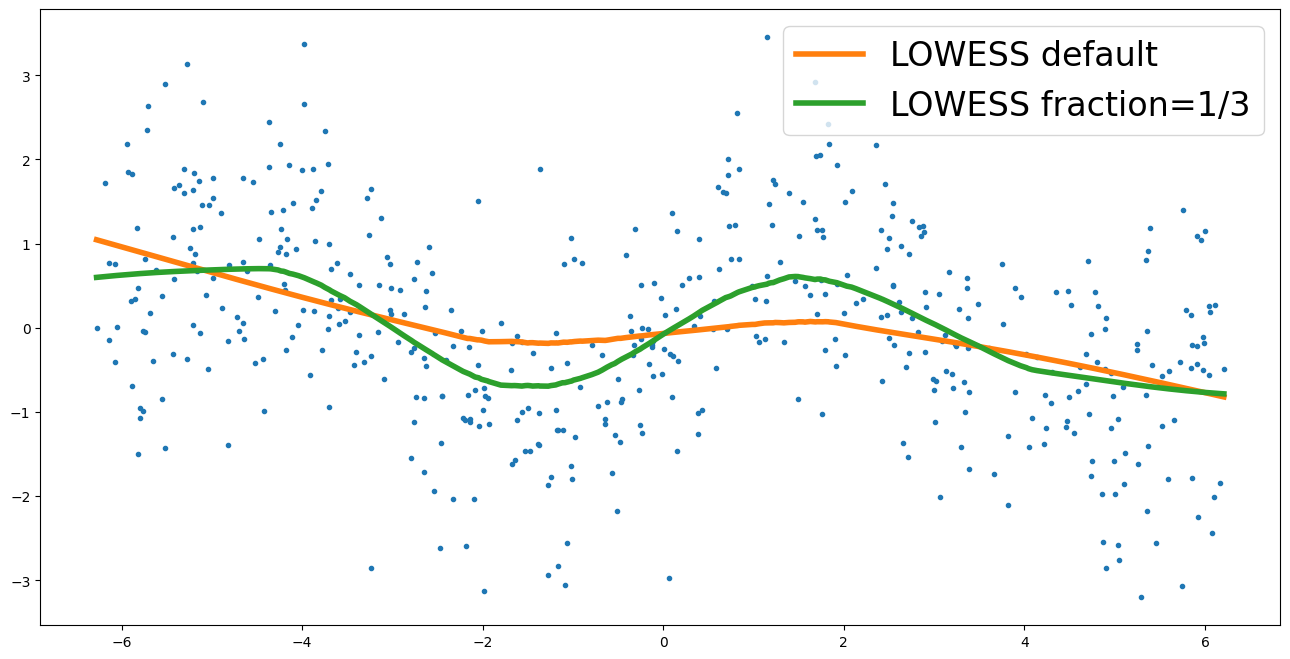

In [34]:
lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x)
w = lowess(y, x, frac=1./3)
plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(*z.T, label='LOWESS default', linewidth=4)
plt.plot(*w.T, label='LOWESS fraction=1/3', linewidth=4)
_ = plt.legend(fontsize=24)

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
from scipy.interpolate import interp1d
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error   
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

LOWESS Fraction = 0.05
 Out of Sample K-Folds MSE
 1.25884 1.04244 1.03422 0.96396 0.72098

LOWESS Fraction = 0.06
 Out of Sample K-Folds MSE
 1.22294 1.04552 1.01717 0.95543 0.71396

LOWESS Fraction = 0.07
 Out of Sample K-Folds MSE
 1.20257 1.04609 1.00003 0.9377 0.72041

LOWESS Fraction = 0.08
 Out of Sample K-Folds MSE
 1.19122 1.04874 0.98882 0.90768 0.7262

LOWESS Fraction = 0.09
 Out of Sample K-Folds MSE
 1.17623 1.05198 0.98134 0.9033 0.73207

LOWESS Fraction = 0.1
 Out of Sample K-Folds MSE
 1.16774 1.04972 0.97044 0.90445 0.73841

LOWESS Fraction = 0.11
 Out of Sample K-Folds MSE
 1.16573 1.04772 0.95992 0.9088 0.74652

LOWESS Fraction = 0.12
 Out of Sample K-Folds MSE
 1.16334 1.04615 0.95076 0.91287 0.75004

LOWESS Fraction = 0.13
 Out of Sample K-Folds MSE
 1.16435 1.0435 0.94688 0.91533 0.75138

LOWESS Fraction = 0.14
 Out of Sample K-Folds MSE
 1.1673 1.04041 0.94446 0.91473 0.75211

LOWESS Fraction = 0.15
 Out of Sample K-Folds MSE
 1.17042 1.03463 0.94167 0.91381 0.75

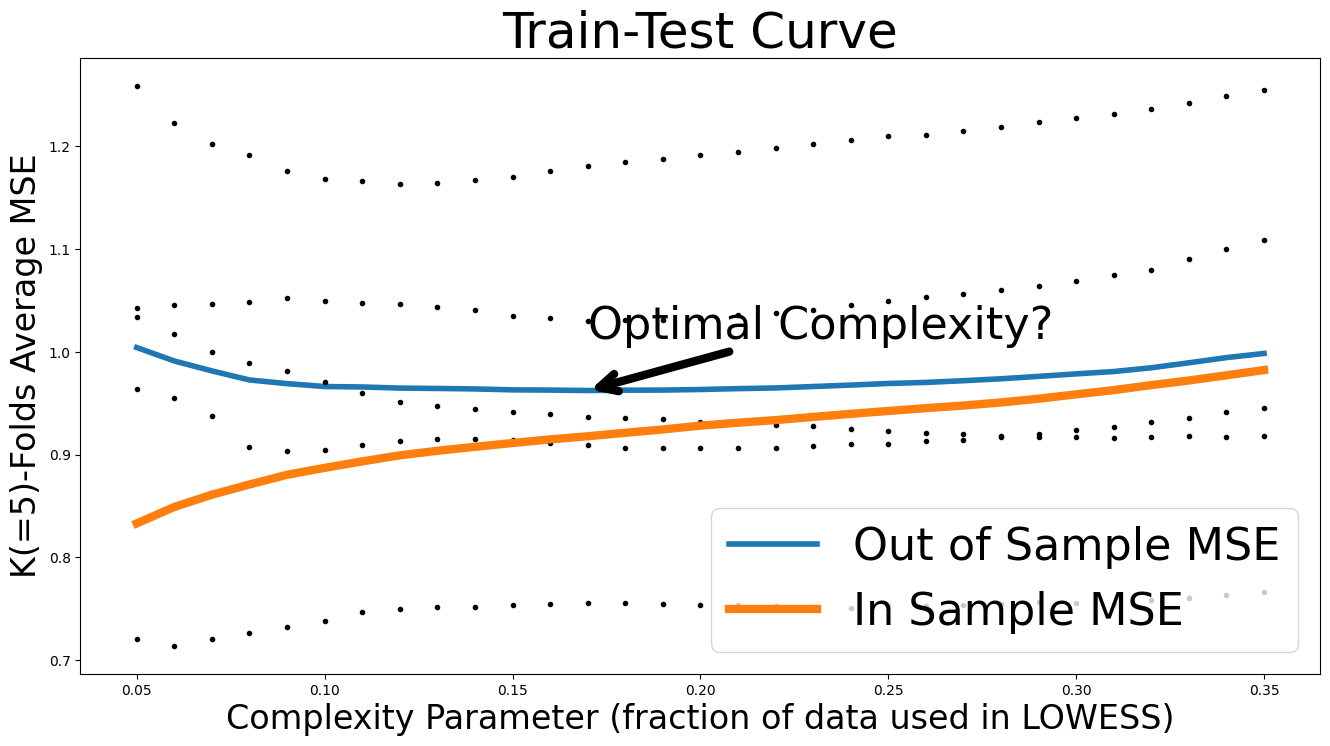

In [121]:
kf = KFold(n_splits=5) # 3 and 10 are common alterntives
complexity_grid = np.linspace(0.05,0.35,31)
complexity_grid_average_KFoldsMSEs = []
complexity_grid_average_MSEs = []
for frac in complexity_grid:
    print("LOWESS Fraction =", str(np.round(frac,3)))
    print(" Out of Sample K-Folds MSE")
    KFoldsOutOfSampleMSEs=[]
    KFoldsInSampleMSEs=[]
    for train_index, test_index in kf.split(x[:,np.newaxis]):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        xyhat = lowess(y_train, x_train, frac=frac)
        yhat = interp1d(*xyhat.T, bounds_error=False, fill_value="extrapolate")
        KFoldsOutOfSampleMSEs += [mean_squared_error(y_test, yhat(x_test))]
        KFoldsInSampleMSEs += [mean_squared_error(y_train, yhat(x_train))]
        print("",str(np.round(KFoldsOutOfSampleMSEs[-1],5)), end='')
    complexity_grid_average_KFoldsMSEs += [np.mean(KFoldsOutOfSampleMSEs)]
    complexity_grid_average_MSEs += [np.mean(KFoldsInSampleMSEs)]
    print("\n")

minMSE = np.min(complexity_grid_average_KFoldsMSEs)
optimal_complexity = complexity_grid[np.argmin(complexity_grid_average_KFoldsMSEs)]
plt.figure(figsize=(16,8))
plt.plot(complexity_grid, complexity_grid_average_KFoldsMSEs, 
         label='Out of Sample MSE', linewidth=4)

if 1:
    for frac in complexity_grid:
        for train_index, test_index in kf.split(x[:,np.newaxis]):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            xyhat = lowess(y_train, x_train, frac=frac)
            yhat = interp1d(*xyhat.T, bounds_error=False, fill_value="extrapolate")
            plt.plot(frac, mean_squared_error(y_test, yhat(x_test)),'k.')

plt.plot(complexity_grid, complexity_grid_average_MSEs, 
         label='In Sample MSE', linewidth=6)
plt.xlabel('Complexity Parameter (fraction of data used in LOWESS)', fontsize=24)
plt.ylabel('K(=5)-Folds Average MSE', fontsize=24)
plt.title('Train-Test Curve', fontsize=36)
plt.annotate("Optimal Complexity?", xy=(optimal_complexity, minMSE), 
             xytext=(optimal_complexity, minMSE+0.05), 
             arrowprops=dict(arrowstyle="->", linewidth=6), fontsize=32)
_ = plt.legend(loc="lower right", fontsize=32)

In [37]:
# https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator
class lowess4sklearn(BaseEstimator):

    def __init__(self, frac=0.5):
        self.frac = frac

    def fit(self, X, y):
        self.xyhat = lowess(y, X[:,0], frac=self.frac)
        return self.xyhat[:,1]

    def predict(self, X):
        yhat = interp1d(*self.xyhat.T, bounds_error=False, fill_value="extrapolate")
        return yhat(X)

    # https://scikit-learn.org/stable/developers/develop.html#get-params-and-set-params

    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {"frac": self.frac}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

GridSearchCV(estimator=lowess4sklearn(),
             param_grid={'frac': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35])},
             scoring='neg_mean_squared_error')
Optimal {'frac': 0.16999999999999998}


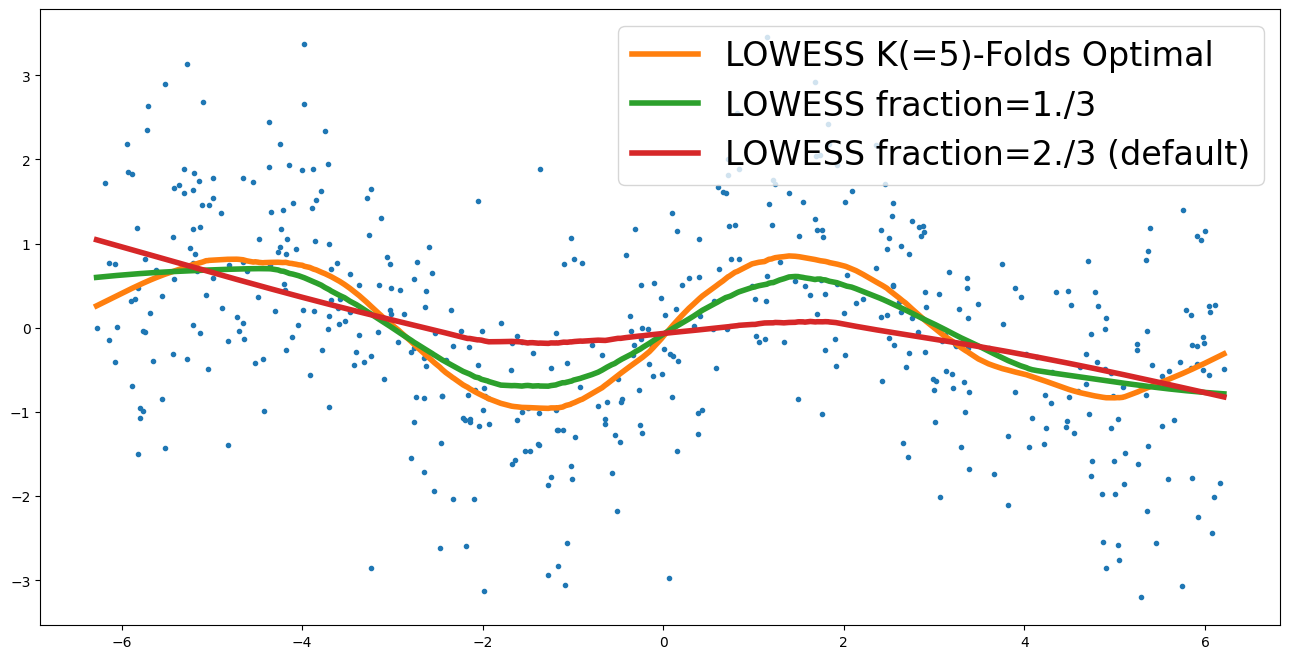

In [38]:
# Or just...

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
parameters = {'frac': complexity_grid}
optimal_smoother = GridSearchCV(lowess4sklearn(), parameters, 
                                scoring='neg_mean_squared_error')
print(optimal_smoother.fit(x[:,np.newaxis], y))
print("Optimal", optimal_smoother.best_params_)

plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(sorted(x),optimal_smoother.predict(sorted(x[:,np.newaxis])), 
         label='LOWESS K(=5)-Folds Optimal', linewidth=4)
plt.plot(*w.T, label='LOWESS fraction=1./3', linewidth=4)
w = lowess(y, x, frac=2./3)
plt.plot(*w.T, label='LOWESS fraction=2./3 (default)', linewidth=4)
w = lowess(y, x, frac=1./3)
_ = plt.legend(fontsize=24)

# Although, to use the `sm.nonparametric.lowess` smoother it must be
# "scikit-learn compatible" as done below

## Bayesian Optimization

In [206]:
KFoldsOutOfSampleMSEs=[]

frac = np.random.uniform()
tuning_parameter = [.05,.3,.5,.9]
observed_MSE_cost = [0]*len(tuning_parameter)
for i in range(len(tuning_parameter)):
    for train_index, test_index in kf.split(x[:,np.newaxis]):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        xyhat = lowess(y_train, x_train, frac=tuning_parameter[i])
        yhat = interp1d(*xyhat.T, bounds_error=False, fill_value="extrapolate")
        KFoldsOutOfSampleMSEs += [mean_squared_error(y_test, yhat(x_test))]
        KFoldsInSampleMSEs += [mean_squared_error(y_train, yhat(x_train))]
    
    observed_MSE_cost[i] = [np.mean(KFoldsOutOfSampleMSEs)]


[[0.05       1.00408772]
 [0.3        0.99127589]
 [0.5        1.02610151]
 [0.9        1.0991373 ]]


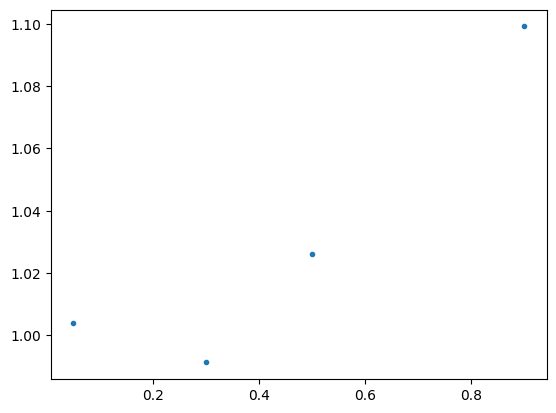

In [207]:
print(np.c_[tuning_parameter, observed_MSE_cost])
plt.plot(tuning_parameter, observed_MSE_cost, '.')

In [282]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1*RBF(length_scale=.25, length_scale_bounds="fixed")
noise_std = 0.001
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(np.array(tuning_parameter).reshape(-1, 1), 
                     np.array(observed_MSE_cost).reshape(-1, 1)-np.mean(observed_MSE_cost))
grid = np.linspace(0,1,1000).reshape(-1, 1)
mean_prediction, std_prediction = gaussian_process.predict(grid, return_std=True)

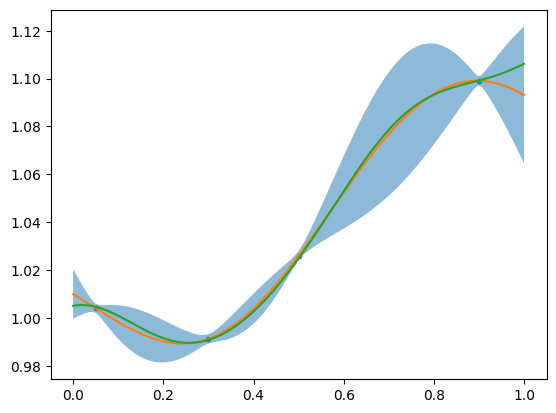

In [283]:
plt.plot(tuning_parameter, observed_MSE_cost, '.')
plt.plot(grid, mean_prediction+np.mean(observed_MSE_cost))
plt.fill_between(grid.flatten(), mean_prediction+np.mean(observed_MSE_cost)-2*std_prediction, 
                                 mean_prediction+np.mean(observed_MSE_cost)+2*std_prediction, alpha=0.5)
uncertainty_draw = gaussian_process.sample_y(grid, random_state=None)
plt.plot(grid, uncertainty_draw+np.mean(observed_MSE_cost));

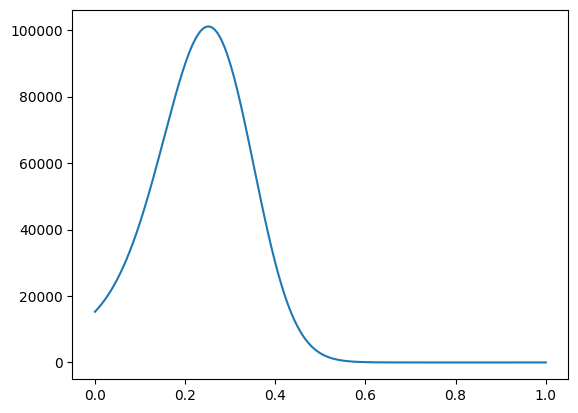

In [279]:
temperature = 1/100
plt.plot(grid,np.exp(-(uncertainty_draw-max(uncertainty_draw))/temperature))